In [1]:
#import relevant libraries: pip install re, pip install natsort, pip install plotly==5.10.0
import sys
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import datetime as dt8
import math
import matplotlib.pyplot as plt
import decimal
import re
from natsort import index_natsorted
import dabest
#import dabest_jck

import NLCLIMB 
import NLGRAPHS
import NLMATH

import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 23.00it/s]


Numba compilation complete!


In [2]:
print(dabest.__version__)
print(np.version.version)
#print(dabest_jck.__version__)

2024.03.30
1.26.4


In [36]:
#initial file processing
computer1 = "C:\\Users\\User"
computer2 = "C:\\Users\\lnico"
computer3 = "C:\\Users\\Star"
homecomp = "D:"
filedir = "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"
openPath = homecomp + filedir
files = os.listdir(openPath)

#identifying genotypes
responder = "Chrimson2"
driver = "SS80896"
wt = "w1118"
transgenic = driver + " x " + responder
filename = openPath + transgenic + ".csv"
filenamewt = openPath + wt+"_"+ transgenic + ".csv"

print(filename)
print(filenamewt)

D:\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\SS80896 x Chrimson2.csv
D:\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\w1118_SS80896 x Chrimson2.csv


# functions

In [5]:
def falls(dfe_dark, dfe_full, dfw_dark, dfw_full):
    
    filtered = (dfe_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered2 = (dfe_full.filter(regex="Fall.*").sum(axis=0))/1
    filtered3 = (dfw_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered4 = (dfw_full.filter(regex="Fall.*").sum(axis=0))/1

    awt=pd.DataFrame()
    awt['Falls']=filtered
    awt['ExperimentState'] = "Dark"

    awt2=pd.DataFrame()
    awt2['Falls']=filtered2
    awt2['ExperimentState'] = "Full"


    awt2b = pd.concat([awt, awt2]).reset_index()
    awt2b["Type"] = "Expt"

    awt3=pd.DataFrame()
    awt3['Falls']=filtered3
    awt3['ExperimentState'] = "Dark"

    awt4=pd.DataFrame()
    awt4['Falls']=filtered4
    awt4['ExperimentState'] = "Full"
    awt4b = pd.concat([awt3, awt4]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def seap(dfexpt, phaser):
    phase = ['Dark', 'Full']
    squak = pd.DataFrame()
    for n in phase:
        fg = pd.DataFrame()
        gh = pd.DataFrame()
        pi = pd.DataFrame()
        dfe_dark = dfexpt[(dfexpt['ExperimentState']== n)] 
        fg['metric'] = dfe_dark.head(int(len(dfe_dark)/2)).filter(regex="Fall.*").sum(axis=0)
        fg['genre'] = n + " " + phaser + " 10"
        fg['time'] = 10
        gh['metric'] = dfe_dark.tail(int(len(dfe_dark)/2)).filter(regex="Fall.*").sum(axis=0)
        gh['genre'] = n + " " + phaser + " 20"
        gh['time']= 20
        pi = pd.concat([fg, gh], axis = 0)     
        pi['phase'] = n
        pi['type'] = phaser
        
        squak = pd.concat([squak, pi], axis = 0)
        
    return squak

def sean(dfexpt, phaser):
    phase = ['Dark', 'Full']
    squak = pd.DataFrame()
    for n in phase:
        fg = pd.DataFrame()
        gh = pd.DataFrame()
        pi = pd.DataFrame()
        dfe_dark = dfexpt[(dfexpt['ExperimentState']== n)] 
        fg['metric'] = dfe_dark.head(int(len(dfe_dark)/2)).filter(regex="Velocity.*").mean()
        fg['genre'] = n + " " + phaser + " 10"
        fg['time'] = 10
        gh['metric'] = dfe_dark.tail(int(len(dfe_dark)/2)).filter(regex="Velocity.*").mean()
        gh['genre'] = n + " " + phaser + " 20"
        gh['time']= 20
        pi = pd.concat([fg, gh], axis = 0)     
        pi['phase'] = n
        pi['type'] = phaser
        
        squak = pd.concat([squak, pi], axis = 0)
        
    return squak

def fallsr(dfe_dark, dfe_full, dfw_dark, dfw_full, dfer, dfwr):
    
    filtered = (dfe_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered2 = (dfe_full.filter(regex="Fall.*").sum(axis=0))/1
    filtered3 = (dfw_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered4 = (dfw_full.filter(regex="Fall.*").sum(axis=0))/1
    
    filtered5 = (dfer.filter(regex="Fall.*").sum(axis=0))/1
    filtered6 = (dfwr.filter(regex="Fall.*").sum(axis=0))/1

    awt=pd.DataFrame()
    awt['Falls']=filtered
    awt['ExperimentState'] = "Dark Expt"

    awt2=pd.DataFrame()
    awt2['Falls']=filtered2
    awt2['ExperimentState'] = "Full Expt"
    
    awtt=pd.DataFrame()
    awtt['Falls']=filtered5
    awtt['ExperimentState'] = "Recovery Expt"

    awt2b = pd.concat([awt, awt2, awtt]).reset_index()
    awt2b["Type"] = "Expt"

    awt3=pd.DataFrame()
    awt3['Falls']=filtered3
    awt3['ExperimentState'] = "Dark WT"
    
    awty=pd.DataFrame()
    awty['Falls']=filtered6
    awty['ExperimentState'] = "Recovery WT"

    awt4=pd.DataFrame()
    awt4['Falls']=filtered4
    awt4['ExperimentState'] = "Full WT"
    awt4b = pd.concat([awt3, awt4, awty]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def separation(dfexpt, dfwt, phrase):
    import pandas as pd
    import numpy as np 
        
    dfe_dark = dfexpt[(dfexpt['ExperimentState']== 'Dark')] 
    dfe_full = dfexpt[(dfexpt['ExperimentState']== 'Full')] 
    dfw_dark = dfwt[(dfwt['ExperimentState']== 'Dark')] 
    dfw_full = dfwt[(dfwt['ExperimentState']== 'Full')] 
    
    filterword = phrase + ".*"
    
    expts = [dfe_dark, dfe_full, dfw_dark, dfw_full]
    results = []
    for e in expts:
        filtereddf = e.filter(regex=filterword)
    
        match phrase:
            case "Y":
                result = getattr(filtereddf, "mean")(axis=0)
            case "Fall":
                result = getattr(filtereddf, "sum")(axis=0)/1
                
        results.append(result)
        
    awt=pd.DataFrame()
    awt[phrase]= results[0]
    awt['ExperimentState'] = "Dark"

    awt2=pd.DataFrame()
    awt2[phrase]=results[1]
    awt2['ExperimentState'] = "Full"

    awt2b = pd.concat([awt, awt2]).reset_index()
    awt2b["Type"] = "Expt"


    awt3=pd.DataFrame()
    awt3[phrase]=results[2]
    awt3['ExperimentState'] = "Dark"

    awt4=pd.DataFrame()
    awt4[phrase]=results[3]
    awt4['ExperimentState'] = "Full"
    awt4b = pd.concat([awt3, awt4]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def totalheight(dfexpt, dfwt, driver):
    
    awt5 = separation(dfexpt, dfwt, "Y")
    awt5.loc[awt5['Type'] == 'Expt', 'Type'] = driver
    awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type']

    return awt5

def positional_arguments(dfexpt, driver):

    dftest = dfexpt.copy()
    dff_dark = dftest[(dftest['ExperimentState']== 'Dark')].filter(regex='X_.*|Y_.*|Fall_.*|Pausecount_.*').reset_index(drop=True)
    dff_light = dftest[(dftest['ExperimentState']== 'Full')].filter(regex='X_.*|Y_.*|Fall_.*|Pausecount_.*').reset_index(drop=True)
    #dff_rec = dftest[(dftest['ExperimentState']== 'Recovery')].filter(regex='X_.*|Y_.*|Fall_.*|Pausecount_.*').reset_index(drop=True)    
    
    if (driver == "w1118")|(driver == "WT"):
        drivertype = "WT"
        typeo = "WT"
        
    else:
        drivertype = driver
        typeo = str(drivertype)
        
    listofdffs = [dff_dark, dff_light]
    phases = ['Dark', 'Light']
    ascdesc15 = pd.DataFrame()
    for nn, k in zip(listofdffs, phases):
        ascdesc_df = pd.DataFrame()
        
        for v2 in range(0,len(nn.columns),4):
            
            ascdesc1 = pd.concat([nn.iloc[:,v2], nn.iloc[:,v2+1]], axis=1)
            colname = nn.iloc[:,v2].name.split("_")[1] 

            distancemeasurement = pd.DataFrame()
            distancemeasurement['Distance'] = np.linalg.norm(ascdesc1.diff(axis=0), axis=1)
            
            Directionalchallenges = pd.DataFrame()
            Directionalchallenges['Direction'] = [0]*len(nn)
            Directionalchallenges['Falls and Pause'] = nn.iloc[:,v2+2] + nn.iloc[:,v2+3] #sum of pause and fall events into one column   
            
            Directionalchallenges.loc[(ascdesc1.diff(axis=0).iloc[:,1]>0.0), ['Direction']] = 1  #ascending
            Directionalchallenges.loc[((ascdesc1.diff(axis=0).iloc[:,1]<0.0)&(ascdesc1.diff(axis=0).iloc[:,1]>-4.94)), ['Direction']] = -1  #fall height is recorded to be larger than 4.94 in the negative direction
            Directionalchallenges.loc[(Directionalchallenges['Falls and Pause']>0.0), ['Direction']] = 0  #if a fall or pause has been recorded, it would be either as 1, or 2, and thus more than 0
            
            ascdesc1['Ascending Distance_' + str(colname)] = [0]*len(nn)
            ascdesc1['Descending Distance_' + str(colname)] = [0]*len(nn)
            ascdesc1.loc[(Directionalchallenges['Direction']==1), ['Ascending Distance_' + str(colname)]] = distancemeasurement['Distance']
            ascdesc1.loc[(Directionalchallenges['Direction']== -1), ['Descending Distance_' + str(colname)]] = distancemeasurement['Distance']    

            ascdesc_df = pd.concat([ascdesc_df, ascdesc1], axis=1)
            
            ascdesc2 = pd.DataFrame()
            ascdesc2["Position"] = ascdesc_df.sum(axis=0).filter(regex = "Descending Distance.*|Ascending Distance.*")
            ascdesc2["ExperimentState"] = k
            ascdesc2["Type"] = typeo
            ascdesc2['genre'] = k + " " + drivertype
            ascdesc2 = ascdesc2.reset_index(drop=False)
            
        ascdesc15 = pd.concat([ascdesc15, ascdesc2], axis=0).reset_index(drop=True)

    return ascdesc15

# total to run before graphs

In [37]:
dfe=pd.read_csv(filename)
dfw= pd.read_csv(filenamewt)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.fivesecondrule(NLCLIMB.generation(exptdf, driver)) #do not want assimilation 
dfwt = NLCLIMB.fivesecondrule(NLCLIMB.generation(wtdf, wt))


#falls

dfe_F = NLMATH.falldbest(dfexpt, "Expt")
dfw_F = NLMATH.falldbest(dfwt, "WT")

awt5 = pd.concat([dfe_F, dfw_F], axis = 0).reset_index(drop = True)
awt5 = awt5.replace("Full", "Light")
awt5['Type'] = awt5['Type'].replace("Expt", driver) 
awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type'] 
awt5['value'] = 0
awt5.loc[(awt5['Falls'] >0), ['value']] = 1

paired_prop2 = dabest.load(data = awt5, x = ['ExperimentState', 'Type'], delta2 = True, experiment = "Type", x1_level = ["Dark","Light"],
                              paired = "baseline", id_col="index",proportional=True,
                              experiment_label = ["WT", driver], y = "value")
#special falls
awt6 = awt5.copy()
#awt6.loc[awt6["genre"] == "Light " + driver, ['Falls']] = awt6['Falls'] + 0.01
awt6['Type']= awt6['Type'].replace("Expt", driver) 

deltaplots = dabest.load(data=awt6, x=["ExperimentState","Type"], y="Falls", delta2 = True, experiment="Type", 
                             experiment_label = ["WT", driver], x1_level = ["Dark","Light"], paired = "baseline", id_col = "index")

#avg height
totalclimb = totalheight(dfexpt, dfwt, driver)
totalclimb = totalclimb.replace("Full", "Light")

totalclimber = dabest.load(data=totalclimb, x=["ExperimentState","Type"], y= "Y", delta2 = True, 
                           experiment="Type",experiment_label = ["WT", driver], x1_level = ["Dark","Light"], 
                           paired = "sequential", id_col = "index")

##
df_se = NLMATH.velodabest(dfexpt, "Expt", "Velocity.*")
df_sw = NLMATH.velodabest(dfwt, "WT", "Velocity.*")

fgt6=pd.DataFrame()
fgt6 = pd.concat([df_se, df_sw]).reset_index(drop=False)
fgt6.loc[fgt6['Type'] == 'Expt', 'Type'] = driver
fgt6['genre'] = fgt6['ExperimentState'] + " " + fgt6['Type']
fgt6 = fgt6[(fgt6['ExperimentState'] != "Recovery") ]
fgt6 = fgt6.replace("Full", "Light")

#overallspeed
overallspeed = dabest.load(data=fgt6, x=["ExperimentState","Type"], y="Velocity.*", delta2 = True, experiment="Type", 
                               experiment_label = ["WT", driver], x1_level = ["Dark","Light"], paired = "baseline", id_col = "index")

#ascending descending direction

updown_df = pd.DataFrame()
updown_df = pd.concat([positional_arguments(dfexpt, driver), positional_arguments(dfwt, "w1118")], axis = 0)

descendingdf = updown_df[updown_df['index'].str.contains("Descending.*")].reset_index(drop=True)
ascendingdf = updown_df[updown_df['index'].str.contains("Ascending.*")].reset_index(drop=True)

descent = dabest.load(data=descendingdf, x=["ExperimentState","Type"], y="Position", delta2 = True, experiment="Type", 
                               experiment_label = ["WT", driver], x1_level = ["Dark","Light"], paired = "baseline", id_col = "index")

ascent = dabest.load(data=ascendingdf, x=["ExperimentState","Type"], y="Position", delta2 = True, experiment="Type", 
                               experiment_label = ["WT", driver], x1_level = ["Dark","Light"], paired = "baseline", id_col = "index")


c:\Users\user\anaconda3\envs\osaronly\lib\site-packages\dabest\_dabest_object.py:506: UserWarning: Only mean_diff is supported for proportional data when `delta2` is True
  warnings.warn(message=mes1, category=UserWarning)


# Graphs

c:\Users\user\anaconda3\envs\osaronly\lib\site-packages\dabest\plot_tools.py:2937: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(
c:\Users\user\anaconda3\envs\osaronly\lib\site-packages\dabest\plot_tools.py:2937: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(
c:\Users\user\anaconda3\envs\osaronly\lib\site-packages\dabest\plot_tools.py:2937: UserWarning: *c* argument looks like a single numeric RGB or RG

Text(0.5, 0.91, 'SS80896 x Chrimson2')

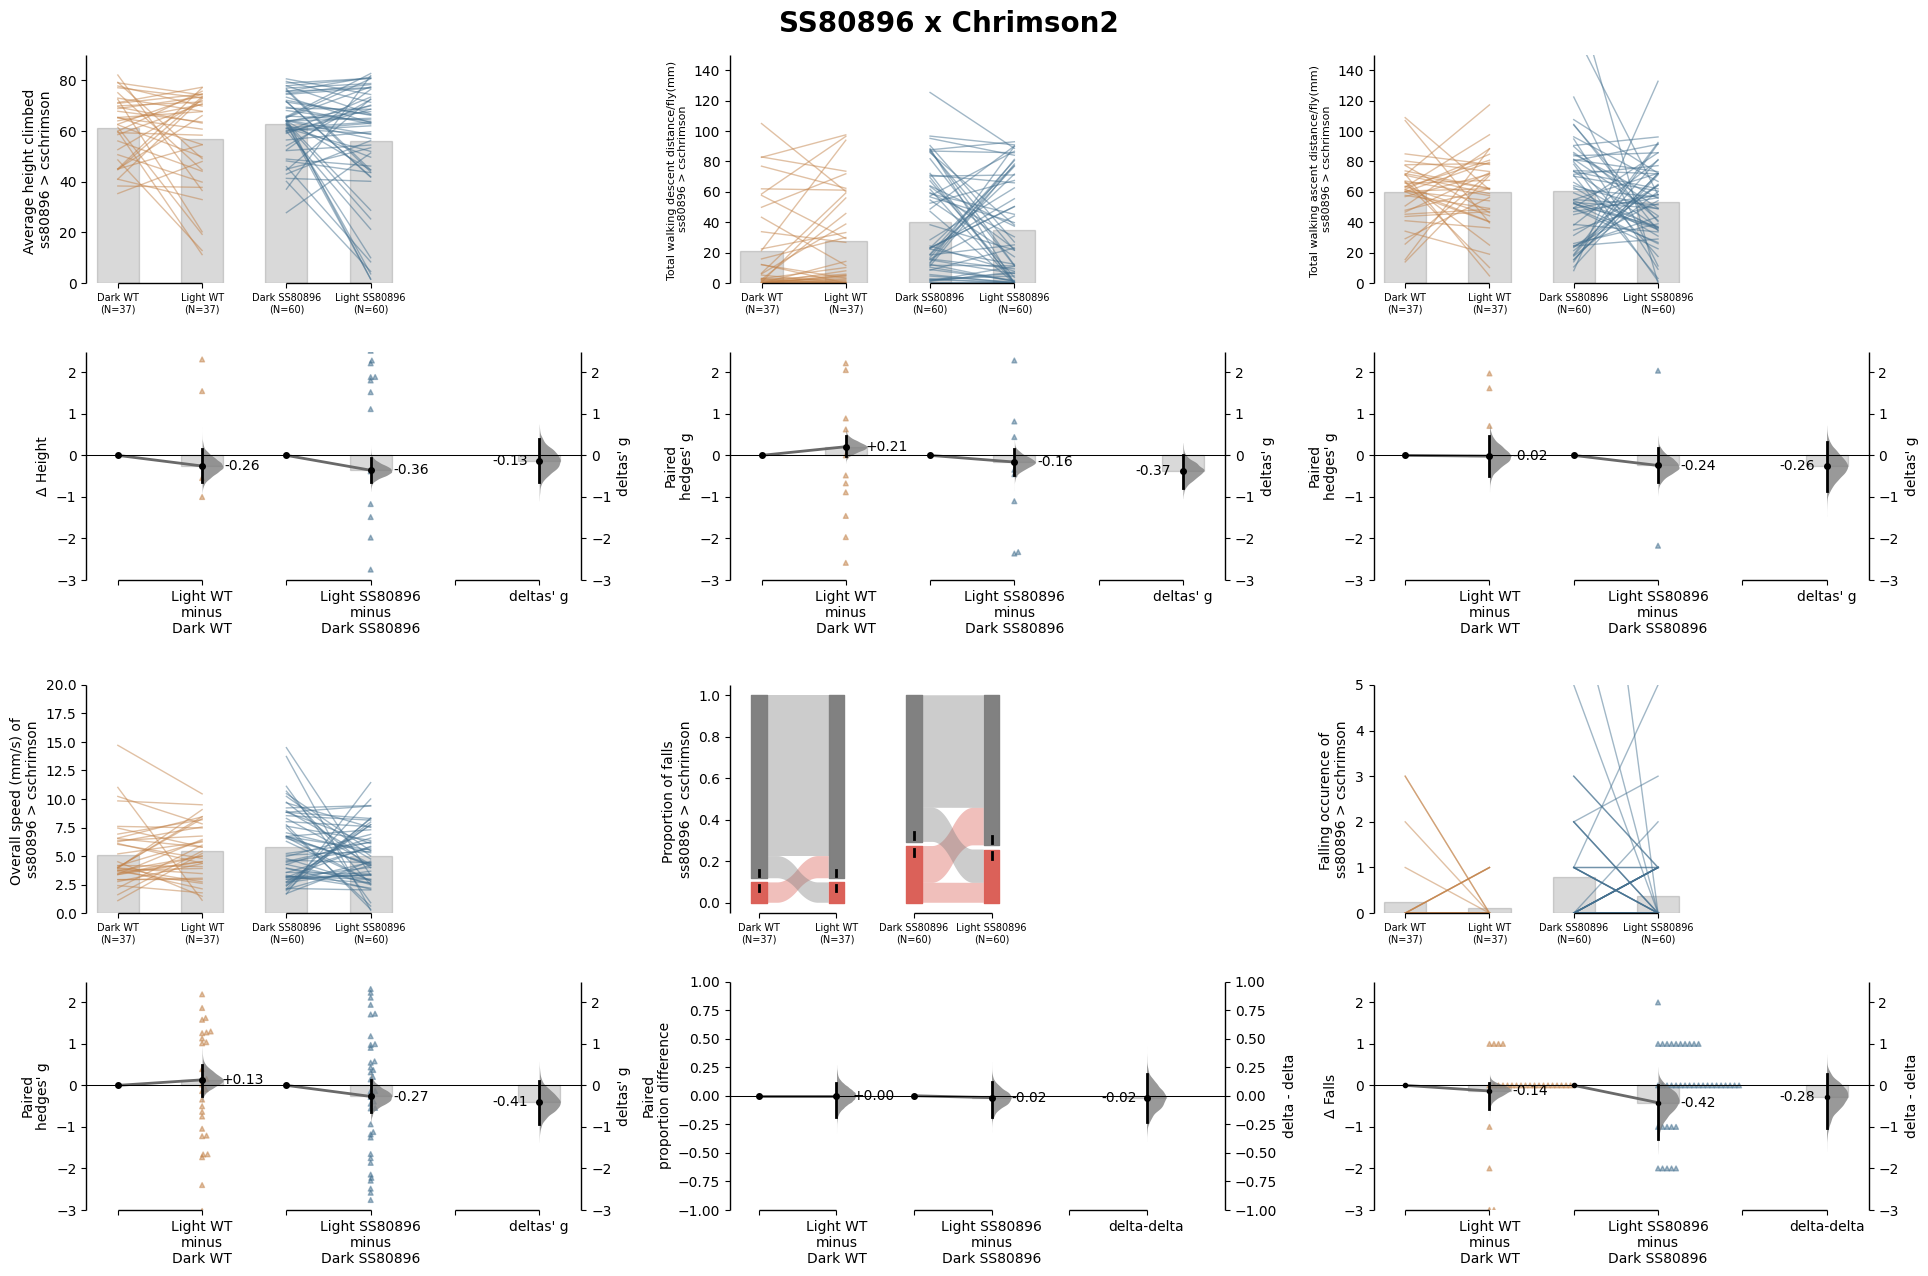

In [38]:
import seaborn as sns
f, axx = plt.subplots(nrows=2, ncols=3,
                    figsize=(23
                             ,15),
                    gridspec_kw={'wspace': 0.3
                                } # ensure proper width-wise spacing.
                   )

if "Chrimson2" in responder:
   transgenicname = driver + " > CsChrimson"
if "ACR" in responder:
   transgenicname = driver + " > GtACR1"
   

totalclimber.delta_g.plot(swarm_label="Average height climbed \n" + transgenicname,
                                    contrast_label="Δ Height", swarm_ylim = (0,90), contrast_ylim=(-3, 2.5),  fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10, 
                                    fontsize_contrastylabel=10, fontsize_delta2label=10, es_marker_size=4,
                                    ax=axx.flat[0]);


# axx[0].set_xticklabels(["DARK \nw1118", "LIGHT \nw1118" , "DARK \n" + driver, "LIGHT \n" + driver])


overallspeed.delta_g.plot(swarm_label="Overall Speed (mm/s) of \n" + transgenicname ,
                                       es_marker_size=4, swarm_ylim=(0,20), contrast_ylim = (-3, 2.5),  fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10,
                                    fontsize_contrastylabel=10, fontsize_delta2label=10,
                                    ax=axx.flat[3]);       #contrast_label="Δ Speed",

# axx[1].set_xticklabels(["DARK \nw1118", "LIGHT \nw1118" , "DARK \n" + driver, "LIGHT \n" + driver], fontsize)


paired_prop2.mean_diff.plot(bar_label = "Proportion of falls \n" + transgenicname,contrast_ylim=(-1, 1), fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10, es_marker_size=4,
                                    fontsize_contrastylabel=10, fontsize_delta2label=10, ax=axx.flat[4]);
# axx[2].set_xticklabels(["DARK \nw1118", "LIGHT \nw1118" , "DARK \n" + driver, "LIGHT \n" + driver])



descent.delta_g.plot(swarm_label="Total walking descent distance/fly(mm) \n" + transgenicname ,
                                       swarm_ylim=(0,150), contrast_ylim = (-3, 2.5),  fontsize_rawxlabel=7, fontsize_rawylabel=8, fontsize_contrastxlabel=10, es_marker_size=4,
                                    fontsize_contrastylabel=10, fontsize_delta2label=10, ax=axx.flat[1]
                                    );

ascent.delta_g.plot(swarm_label="Total walking ascent distance/fly(mm) \n" + transgenicname ,
                                       swarm_ylim=(0,150), contrast_ylim = (-3, 2.5),  fontsize_rawxlabel=7, fontsize_rawylabel=8, fontsize_contrastxlabel=10, es_marker_size=4,
                                    fontsize_contrastylabel=10, fontsize_delta2label=10, ax=axx.flat[2]
                                    );
##need to run this (Falling specifically)
deltaplots.mean_diff.plot(swarm_label="Falling occurence of \n" + transgenicname,
                                     contrast_label="Δ Falls", raw_marker_size=2, swarm_ylim=(0,5),  fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10,es_marker_size=3,
                                       fontsize_contrastylabel=10, fontsize_delta2label=10, contrast_ylim = (-3, 2.5), ax=axx.flat[5]);

   
# axx.flat[0].legend_.remove()
# axx.flat[1].legend_.remove()
# axx.flat[3].legend_.remove()
# axx.flat[4].legend_.remove()
# axx.flat[5].legend_.remove()
f.suptitle(transgenic, weight = "bold", fontsize =20, y=0.91)

# different falling plot

In [26]:
awt5

,index,Falls,ExperimentState,Type,genre,value
0,VT999036 Fall_2,0.0,Dark,Expt,Dark VT999036,0
1,VT999036 Fall_3,0.0,Dark,Expt,Dark VT999036,0
2,VT999036 Fall_4,0.0,Dark,Expt,Dark VT999036,0
3,VT999036 Fall_5,0.0,Dark,Expt,Dark VT999036,0
4,VT999036 Fall_6,0.0,Dark,Expt,Dark VT999036,0
...,...,...,...,...,...,...
607,w1118 Fall_165,0.0,Recovery,WT,Recovery WT,0
608,w1118 Fall_166,0.0,Recovery,WT,Recovery WT,0
609,w1118 Fall_167,0.0,Recovery,WT,Recovery WT,0
610,w1118 Fall_169,0.0,Recovery,WT,Recovery WT,0


In [27]:
dfe=pd.read_csv(filename)
dfw= pd.read_csv(filenamewt)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.fivesecondrule(NLCLIMB.generation(exptdf, driver))
dfwt = NLCLIMB.fivesecondrule(NLCLIMB.generation(wtdf, wt))


#falls

dfe_F = NLMATH.falldbest(dfexpt, "Expt")
dfw_F = NLMATH.falldbest(dfwt, "WT")

awt5 = pd.concat([dfe_F, dfw_F], axis = 0).reset_index(drop = True)
awt5['Type'] = awt5['Type'].replace("Expt", driver)
awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type']
awt5['value'] = 0
awt5.loc[(awt5['Falls'] >0), ['value']] = 1

fallingsonly = dabest.load(data=awt5, x=["ExperimentState","Type"], y= "value", delta2 = True, 
                           experiment="Type",experiment_label = ["WT", driver], x1_level = ["Dark","Full"], 
                           paired = "sequential", id_col = "index")

# paired_prop2 = dabest_jck.load(data = awt5,idx=(("Dark WT", "Full WT"),("Dark " + driver, "Full " +driver)),
#                               paired = "baseline", id_col="index",proportional=True,
#                               x = "genre", y = "value")

#avg height
totalclimb = totalheight(dfexpt, dfwt, driver)

totalclimber = dabest.load(data=totalclimb, x=["ExperimentState","Type"], y= "Y", delta2 = True, 
                           experiment="Type",experiment_label = ["WT", driver], x1_level = ["Dark","Full"], 
                           paired = "sequential", id_col = "index")

##
df_se = NLMATH.velodabest(dfexpt, "Expt", "Velocity.*")
df_sw = NLMATH.velodabest(dfwt, "WT", "Velocity.*")

fgt6=pd.DataFrame()
fgt6 = pd.concat([df_se, df_sw]).reset_index(drop=False)
fgt6.loc[fgt6['Type'] == 'Expt', 'Type'] = driver
fgt6['genre'] = fgt6['ExperimentState'] + " " + fgt6['Type']
fgt6 = fgt6[(fgt6['ExperimentState'] != "Recovery") ]

#overallspeed
overallspeed = dabest.load(data=fgt6, x=["ExperimentState","Type"], y="Velocity.*", delta2 = True, experiment="Type", 
                               experiment_label = ["WT", driver], x1_level = ["Dark","Full"], paired = "baseline", id_col = "index")



c:\Users\user\anaconda3\lib\site-packages\dabest\plot_tools.py:1232: UserWarning: 0.7% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


ValueError: The divisor is zero, indicating no variability in the data.

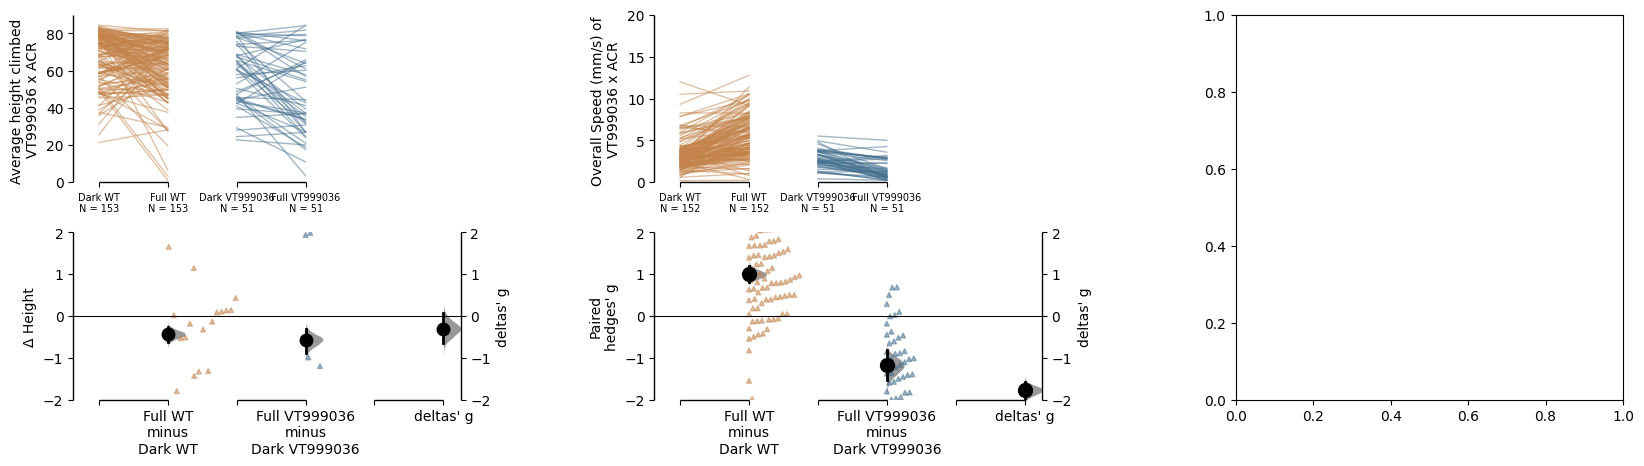

In [29]:
import seaborn as sns
f, axx = plt.subplots(nrows=1, ncols=3,
                    figsize=(20
                             ,5),
                    gridspec_kw={'wspace': 0.5
                                } # ensure proper width-wise spacing.
                   )


totalclimber.delta_g.plot(swarm_label="Average height climbed \n" + transgenic,
                                    contrast_label="Δ Height", swarm_ylim = (0,90), contrast_ylim=(-2, 2),  fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10, 
                                    fontsize_contrastylabel=10, fontsize_delta2label=10,
                                    ax=axx.flat[0]);
axx[0].legend_.remove()

overallspeed.delta_g.plot(swarm_label="Overall Speed (mm/s) of \n" + transgenic ,
                                       es_marker_size=10, swarm_ylim=(0,20), contrast_ylim=(-2, 2),  fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10, 
                                    fontsize_contrastylabel=10, fontsize_delta2label=10,
                                    ax=axx.flat[1]);       #contrast_label="Δ Speed",
axx[1].legend_.remove()

fallingsonly.delta_g.plot(bar_label = "Proportion of falls \n" + transgenic,contrast_ylim=(-1, 1), fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10, 
                                    fontsize_contrastylabel=10, fontsize_delta2label=10, ax=axx.flat[2]);


In [41]:
f.savefig(openPath + 'images\\threedabestplots_20230915' +  transgenic + ".svg", dpi = 600)